# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [23]:
import pandas as pd

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [24]:
# install openpyxl
# !pip --quiet install openpyxl
# set limit to 30000 rows with nrows parameter
df = pd.read_excel('./NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', nrows= 30000)
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [25]:
# check the number of rows
len(df)

30000

In [26]:
# check the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          30000 non-null  int64         
 1   Animal Name             29939 non-null  object        
 2   Animal Gender           30000 non-null  object        
 3   Primary Breed           30000 non-null  object        
 4   Secondary Breed         3988 non-null   object        
 5   Animal Dominant Color   29885 non-null  object        
 6   Animal Secondary Color  20946 non-null  object        
 7   Animal Third Color      6629 non-null   object        
 8   Animal Birth            30000 non-null  datetime64[ns]
 9   Spayed or Neut          30000 non-null  object        
 10  Guard or Trained        19826 non-null  object        
 11  Vaccinated              30000 non-null  object        
 12  Application Date        30000 non-null  dateti

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

* Each row is a dog license in NYC
* Animal Name: The name of the animal/dog
* Animal Gender: Is the animal/dog a female or male

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

1. What are the top 10 most popular dog breeds in the dataset?
2. How does the distribution of dog ages vary across different breeds?
3. What is the ratio of male to female dogs for each breed in the dataset?


# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [27]:
df['Primary Breed'].value_counts().head(10)

Primary Breed
Unknown                                 4777
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Name: count, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

...maybe "unknown" should just count as missing data?

In [28]:
df[df['Primary Breed'] != 'Unknown']['Primary Breed'].value_counts().head(10)

Primary Breed
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: count, dtype: int64

## What are the most popular dog names?

In [29]:
df[(df['Animal Name'] != 'UNKNOWN') & (df['Animal Name'] != 'Unknown')]['Animal Name'].value_counts().head(10)

Animal Name
Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Daisy       90
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [30]:
df_named_patrick = df[df['Animal Name'] == 'Patrick']['Animal Name'].count()

print(f"{df_named_patrick} dogs are named Patrick")

4 dogs are named Patrick


In [31]:
df[df['Animal Name'] == 'Max']['Animal Name'].value_counts().head(1)

Animal Name
Max    202
Name: count, dtype: int64

In [32]:
df_named_max = df[df['Animal Name'] == 'Max']['Animal Name'].count()

print(f"{df_named_max} dogs are named Max")

202 dogs are named Max


In [33]:
df_named_maxwell = df[df['Animal Name'] == 'Maxwell']['Animal Name'].count()

print(f"{df_named_maxwell} dogs are named Max")

11 dogs are named Max


## What percentage of dogs are guard dogs?

In [34]:
# Calculate the percentage of dogs that are guard dogs
percentage_yes = (df['Guard or Trained'] == 'Yes').mean() * 100

# Print the result
print(f"Percentage of dogs that are guard dogs: {percentage_yes:.2f}%")


Percentage of dogs that are guard dogs: 0.06%


## What are the actual numbers?

In [35]:
number_of_yes = df[df['Guard or Trained'] == 'Yes']['Guard or Trained'].count()
print(f"There are {number_of_yes} guard dogs")

There are 17 guard dogs


## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll be a little more specific when using `.value_counts()`

In [36]:
# look at the value counts for the 'Guard or Trained' column to see the total no and yes
df['Guard or Trained'].value_counts()

Guard or Trained
No     19809
Yes       17
Name: count, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

In this case, it seems nicer than missing data. Then check your result with another `.value_counts()`

In [37]:
# Replace guard or trained with No for missing values. Can do this with fillna
df['Guard or Trained'] = df['Guard or Trained'].fillna('No')
# Check the values again. Are there 30000 rows now?
df['Guard or Trained'].value_counts()


Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [38]:
df[df['Guard or Trained'] == 'Yes']['Primary Breed'].value_counts().head(10)

Primary Breed
Unknown                       5
German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

If `Animal Birth` is a datetime it makes things much easier.

In [39]:
# Create a new column called 'year' that is the value of the 'Animal Birth' column
df['year'] = pd.DatetimeIndex(df['Animal Birth']).year
# Check to make sure the column was created
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [40]:
# Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?
df['age'] = 2024 - df['year']
# Check to make sure the column was created
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,17
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,11
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,10
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,16
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,10


In [41]:
# Calculate the average age of dogs
df['age'].mean()

print(f"The average age of dogs is {df['age'].mean():.2f} years")

The average age of dogs is 14.71 years


# Joining data together

In [42]:
# Load the CSV dataset
df_zipcodes = pd.read_csv('./zipcodes-neighborhoods.csv')
df_zipcodes.head(5)

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [43]:
# Assuming the common column is 'Zipcode' in both datasets
# Merge the dataframes on the common column
merged_df = df.merge(df_zipcodes, left_on='Owner Zip Code', right_on='zip')

# Check the first 5 rows of the merged dataframe
merged_df.head(5)


,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,17,Upper West Side,10024,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,11,Southeast Bronx,10461,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013,Manhattan
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,16,Upper West Side,10025,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [44]:
# What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?
# Bronx
bronx = merged_df[merged_df['borough'] == 'Bronx']
bronx['Animal Name'].value_counts().head(1)

Animal Name
Bella    22
Name: count, dtype: int64

In [45]:
# Brooklyn
brooklyn = merged_df[(merged_df['borough'] == 'Brooklyn') & (merged_df['Animal Name'] != 'Unknown')]
brooklyn['Animal Name'].value_counts().head(1)


Animal Name
Max    46
Name: count, dtype: int64

In [46]:
# Upper East Side
upper_east_side = merged_df[merged_df['neighborhood'] == 'Upper East Side']
upper_east_side['Animal Name'].value_counts().head(1)

Animal Name
Charlie    19
Name: count, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [65]:
# Filter out 'Unknown' breeds
filtered_df = merged_df[merged_df['Primary Breed'] != 'Unknown']

# Group by neighborhood and Primary Breed, then count the occurrences
breed_counts = filtered_df.groupby(['neighborhood'])['Primary Breed'].value_counts()

# Find the neighborhood with the most of each breed
breed_counts.groupby('neighborhood').head(1).sort_values(ascending=False)

neighborhood                   Primary Breed                       
Upper West Side                Labrador Retriever                      121
West Queens                    Shih Tzu                                 95
Upper East Side                Havanese                                 94
South Shore                    Shih Tzu                                 90
Southern Brooklyn              Yorkshire Terrier                        85
Southeast Bronx                Shih Tzu                                 83
Chelsea and Clinton            Chihuahua                                80
Lower East Side                Chihuahua                                77
West Central Queens            Yorkshire Terrier                        72
Northwest Brooklyn             Labrador Retriever                       72
Southwest Brooklyn             Shih Tzu                                 69
Northwest Queens               Chihuahua                                62
Canarsie and Flatlands         S

## What breed of dogs are the least likely to be spayed/neutered? Male or female?

In [60]:
# What breed of dogs are the least likely to be spayed/neutered? Male or female?

# Filter out 'Unknown' breeds
merged_df = merged_df[merged_df['Primary Breed'] != 'Unknown']

# Group by Primary Breed and Spayed or Neutered, then count the occurrences
spayed_neutered_counts = merged_df.groupby(['Primary Breed'])['Spayed or Neut'].value_counts()

# Find the breed that is least likely to be spayed/neutered
spayed_neutered_counts.groupby('Primary Breed').tail(1).sort_values(ascending=False).head(1)



Primary Breed      Spayed or Neut
Yorkshire Terrier  No                531
Name: count, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

When plotting, use `kind='barh'`. I didn't say this in class, but horizontal bar graphs are the only graphs I like!

<Axes: ylabel='borough'>

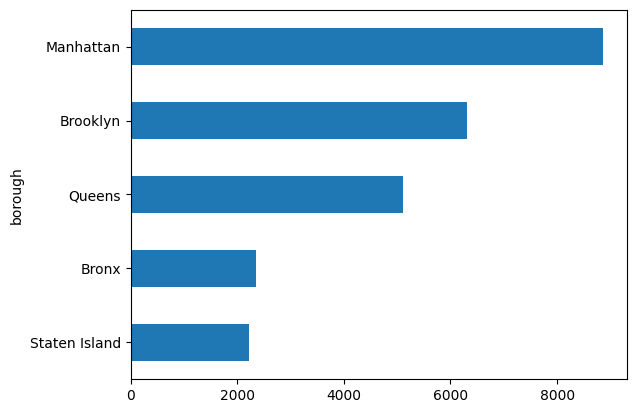

In [63]:
# Import the matplotlib library
import matplotlib.pyplot as plt

# Group by borough and count the number of dogs in each borough
borough_counts = merged_df['borough'].value_counts().sort_values(ascending=True)

# Plot the number of dogs in each borough
borough_counts.plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.